In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import scipy

from datetime import datetime 
import statsmodels.formula.api as smf  

from matplotlib import style
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties 
from pylab import mpl

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell 

InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)

In [3]:
from pandas.tseries.offsets import MonthEnd # 月末
Market_ret = pd.read_csv('d:\python2025/Marketret_mon_stock2024.csv')
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format='%b %Y') + MonthEnd(0)
Market_ret.set_index('month', inplace=True)
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret  

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


In [5]:
inflation = pd.read_csv('d:\python2025/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2025-03-31,-0.1
2025-04-30,-0.1
2025-05-31,-0.1


In [8]:
price_dividend = pd.read_csv('d:\python2025/Price_dividend_mon2024.csv')
price_dividend['month'] = pd.date_range(start='1990-12-31', end='2024-12-31', freq='M')
price_dividend.set_index('month', inplace=True)
price_dividend.sort_index(inplace=True)
price_dividend = price_dividend.drop(columns=['Unnamed: 0'])

price_earning = pd.read_csv('d:\python2025/Price_earnings_mon2024.csv')
price_earning['month'] = pd.date_range(start='1991-01-31', end='2024-12-31', freq='M')
price_earning.set_index('month', inplace=True)
price_earning.sort_index(inplace=True)

price_bookvalue = pd.read_csv('d:\python2025/Price_bookvalue_mon2024.csv')
price_bookvalue['month'] = pd.date_range(start='1990-12-31', end='2024-12-31', freq='M')
price_bookvalue.set_index('month', inplace=True)
price_bookvalue.sort_index(inplace=True)

In [9]:
Market_ret_day = pd.read_excel('d:\python2025/Marketret_day_stock2024.xlsx')
Market_ret_day['Day'] = pd.to_datetime(Market_ret_day['Day'],format='%Y-%m-%d')
Market_ret_day.set_index('Day',inplace=True)
Market_ret_day.sort_index(inplace=True)
Market_ret_day

,MarketR,MarketR_e,month,Q,rfday,er,er1,er2,er3,er4,neg_er,neg_er1,neg_er2,neg_er3,pos_er,pos_er1,pos_er2,pos_er3
Day,,,,,,,,,,,,,,,,,,
1990-12-20,0.050067,0.752547,12 1990,1990 Q4,0.000227,0.049840,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.049840,NaN,NaN,NaN
1990-12-21,0.039671,67.771445,12 1990,1990 Q4,0.000227,0.039444,0.049840,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.039444,0.049840,NaN,NaN
1990-12-24,0.049380,0.049638,12 1990,1990 Q4,0.000227,0.049153,0.039444,0.049840,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.049153,0.039444,0.049840,NaN
1990-12-25,0.049938,0.050022,12 1990,1990 Q4,0.000227,0.049711,0.049153,0.039444,0.049840,NaN,0.000000,0.000000,0.000000,0.000000,0.049711,0.049153,0.039444,0.049840
1990-12-26,0.050151,0.050151,12 1990,1990 Q4,0.000227,0.049924,0.049711,0.049153,0.039444,0.049840,0.000000,0.000000,0.000000,0.000000,0.049924,0.049711,0.049153,0.039444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,-0.004361,-0.019226,12 2024,2024 Q4,0.000037,-0.004398,0.012003,-0.009967,-0.000314,-0.001943,-0.004398,0.000000,-0.009967,-0.000314,0.000000,0.012003,0.000000,0.000000
2024-12-26,0.002969,0.011729,12 2024,2024 Q4,0.000037,0.002932,-0.004398,0.012003,-0.009967,-0.000314,0.000000,-0.004398,0.000000,-0.009967,0.002932,0.000000,0.012003,0.000000
2024-12-27,0.002119,0.008489,12 2024,2024 Q4,0.000037,0.002082,0.002932,-0.004398,0.012003,-0.009967,0.000000,0.000000,-0.004398,0.000000,0.002082,0.002932,0.000000,0.012003


In [12]:
Market_variance = Market_ret_day.resample('M').apply(lambda df: pd.Series({
    'RV': (df['er']**2).sum(),
    'RV1': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum(),
    'RV2': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum() + 2*(df['er']*df['er2']).sum(),
    'RV3': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum() + 2*(df['er']*df['er2']).sum() + 2*(df['er']*df['er3']).sum()
}))

Market_variance['var'] = Market_ret_day.resample('M')['er'].var()
Market_variance.index.name = 'month'
Market_variance['RV1'] = Market_variance['RV1'].where(Market_variance['RV1']>=0, Market_variance['RV'])
Market_variance['RV2'] = Market_variance['RV2'].where(Market_variance['RV2']>=0, Market_variance['RV1'])
Market_variance['RV3'] = Market_variance['RV3'].where(Market_variance['RV3']>=0, Market_variance['RV2'])
Market_variance

,RV,RV1,RV2,RV3,var
month,,,,,
1990-12-31,0.011709,0.030732,0.046608,0.058424,0.000395
1991-01-31,0.000690,0.001566,0.002593,0.003461,0.000030
1991-02-28,0.000418,0.000707,0.000853,0.000763,0.000024
1991-03-31,0.001229,0.002925,0.004650,0.006369,0.000014
1991-04-30,0.000855,0.001973,0.003364,0.004531,0.000010
...,...,...,...,...,...
2024-08-31,0.000881,0.000823,0.000487,0.000487,0.000040
2024-09-30,0.012481,0.023868,0.034838,0.041347,0.000593
2024-10-31,0.011652,0.007954,0.006707,0.006707,0.000685


In [14]:
reg_data = pd.merge(Market_ret,inflation,on = 'month')
reg_data = pd.merge(reg_data,Market_variance,on = 'month')
reg_data = pd.merge(reg_data,price_dividend,on = 'month')
reg_data = pd.merge(reg_data,price_earning,on = 'month')
reg_data = pd.merge(reg_data,price_bookvalue,on = 'month')
reg_data = reg_data[['MarketR','rfmonth','ret','cpi','RV','RV1','RV2','RV3','var','pd','pe','pb','marketret3','marketret6','marketret12']]

reg_data.to_csv('d:\python2025/reg_data.csv')

reg_data.to_excel('d:\python2025/reg_data.xlsx')

reg_data

,MarketR,rfmonth,ret,cpi,RV,RV1,RV2,RV3,var,pd,pe,pb,marketret3,marketret6,marketret12
month,,,,,,,,,,,,,,,
1991-01-31,0.029998,0.006930,0.023068,2.2,0.000690,0.001566,0.002593,0.003461,0.000030,NaN,4.466562,2.080065,-0.084127,-0.305662,0.254049
1991-02-28,0.010203,0.006930,0.003273,1.0,0.000418,0.000707,0.000853,0.000763,0.000024,NaN,4.501042,1.949285,-0.183573,-0.384745,0.241492
1991-03-31,-0.099663,0.006930,-0.106593,1.6,0.001229,0.002925,0.004650,0.006369,0.000014,NaN,4.112082,1.560324,-0.252928,-0.445049,0.288857
1991-04-30,-0.079652,0.006651,-0.086303,1.3,0.000855,0.001973,0.003364,0.004531,0.000010,NaN,4.111121,1.970330,-0.234776,-0.394937,0.691749
1991-05-31,-0.074521,0.006092,-0.080613,3.6,0.000480,0.001262,0.002119,0.002949,0.000005,NaN,4.182871,1.901101,-0.236294,0.181673,1.542701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,0.001118,-0.032586,0.6,0.000881,0.000823,0.000487,0.000487,0.000040,10.728048,2.502897,0.097936,0.151050,NaN,NaN
2024-09-30,0.195992,0.001118,0.194874,0.4,0.012481,0.023868,0.034838,0.041347,0.000593,10.889979,2.675435,0.275764,0.200147,NaN,NaN
2024-10-31,-0.003409,0.001118,-0.004527,0.3,0.011652,0.007954,0.006707,0.006707,0.000685,10.862945,2.635010,0.254341,0.000228,NaN,NaN


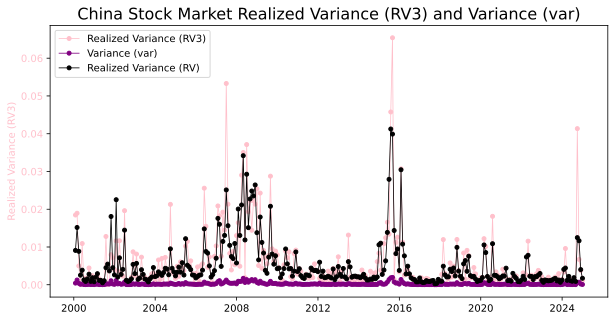

In [16]:
reg_data_plot = reg_data['2000-01':'2024-12'].copy()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(reg_data_plot['RV3'],color='pink',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance (RV3)')
ax1.set_ylabel('Realized Variance (RV3)',color='pink')
ax1.tick_params(axis='y', labelcolor='pink')   
ax1.set_title("China Stock Market Realized Variance (RV3) and Variance (var)", fontsize=16)

ax1.plot(reg_data_plot['var'],color='purple',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Variance (var)')
ax1.plot(reg_data_plot['RV'],color='black',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance (RV)')

ax1.legend(loc='upper left')
plt.show();

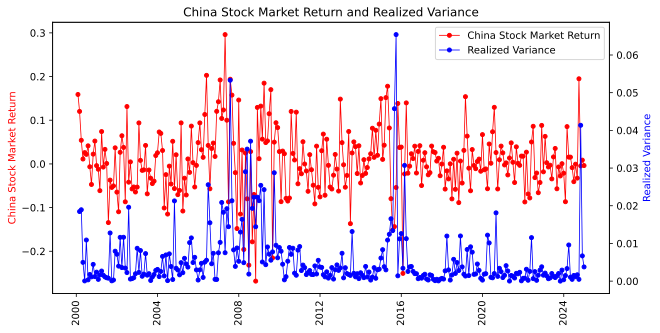

In [17]:
reg_data_plot = reg_data['2000-01':'2024-12'].copy()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(reg_data_plot['ret'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='red')

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation = 90)


ax2 = ax1.twinx()
ax2.plot(reg_data_plot['RV3'].shift(1),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance')

ax2.set_ylabel('Realized Variance',color='blue')

plt.title('China Stock Market Return and Realized Variance')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show();

In [18]:
reg_data['RV'].describe().round(5)

count    408.00000
mean       0.00876
std        0.01858
min        0.00027
25%        0.00189
50%        0.00357
75%        0.00882
max        0.25211
Name: RV, dtype: float64

In [19]:
reg_data['RV'].skew()
reg_data['RV'].kurt()

7.734617011548641

82.80411751131915

In [20]:
from statsmodels.tsa.stattools import adfuller as ADF

adf_result = ADF(reg_data[reg_data.index >= '2000-01-31']['RV'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -3.4302
p-value: 0.0100
Critical Values:
   1%: -3.4527
   5%: -2.8714
   10%: -2.5720
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [21]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_cpi = smf.ols('ret ~ lRV',
                 data=reg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2224
Date:                Thu, 23 Oct 2025   Prob (F-statistic):              0.637
Time:                        10:01:38   Log-Likelihood:                 390.73
No. Observations:                 360   AIC:                            -777.5
Df Residuals:                     358   BIC:                            -769.7
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0099      0.005      1.923      0.0

In [22]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)
model_cpi = smf.ols('ret ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     7.293
Date:                Thu, 23 Oct 2025   Prob (F-statistic):            0.00732
Time:                        10:01:47   Log-Likelihood:                 354.12
No. Observations:                 300   AIC:                            -704.2
Df Residuals:                     298   BIC:                            -696.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0213      0.007      2.874      0.0

In [23]:
model_twovariables = smf.ols('ret ~ lRV + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_twovariables.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.773
Date:                Thu, 23 Oct 2025   Prob (F-statistic):             0.0241
Time:                        10:01:57   Log-Likelihood:                 354.12
No. Observations:                 300   AIC:                            -702.2
Df Residuals:                     297   BIC:                            -691.1
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0212      0.008      2.611      0.0

In [24]:
reg_data['lpd'] = reg_data['pd'].shift(1)
model3 = smf.ols('ret ~ lRV + lpd + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.581
Date:                Thu, 23 Oct 2025   Prob (F-statistic):             0.0537
Time:                        10:02:05   Log-Likelihood:                 354.45
No. Observations:                 300   AIC:                            -700.9
Df Residuals:                     296   BIC:                            -686.1
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0826      0.088      0.937      0.3

In [27]:

Market_variance_Q = Market_ret_day.resample('Q').apply(lambda df: pd.Series({
    'RV': (df['er']**2).sum(),
    'RV1': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum(),
    'RV2': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum() + 2*(df['er']*df['er2']).sum(),
    'RV3': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum() + 2*(df['er']*df['er2']).sum() + 2*(df['er']*df['er3']).sum()
}))

Market_variance_Q['var'] = Market_ret_day.resample('M')['er'].var()
Market_variance_Q.index.name = 'month'

Market_variance_Q['RV1'] = Market_variance_Q['RV1'].where(Market_variance_Q['RV1']>=0, Market_variance_Q['RV'])
Market_variance_Q['RV2'] = Market_variance_Q['RV2'].where(Market_variance_Q['RV2']>=0, Market_variance_Q['RV1'])
Market_variance_Q['RV3'] = Market_variance_Q['RV3'].where(Market_variance_Q['RV3']>=0, Market_variance_Q['RV2'])
Market_variance_Q.index.name = 'Q'
Market_variance_Q

,RV,RV1,RV2,RV3,var
Q,,,,,
1990-12-31,0.011709,0.030732,0.046608,0.058424,0.000395
1991-03-31,0.002337,0.005198,0.008096,0.010593,0.000014
1991-06-30,0.006177,0.008025,0.008207,0.010588,0.000196
1991-09-30,0.119336,0.114575,0.105919,0.105381,0.000262
1991-12-31,0.155513,0.176020,0.199149,0.234951,0.000244
...,...,...,...,...,...
2023-12-31,0.003146,0.004187,0.004378,0.004791,0.000061
2024-03-31,0.009678,0.012825,0.014335,0.013999,0.000058
2024-06-30,0.004243,0.002390,0.003917,0.003171,0.000047


In [29]:
Q_marketret = reg_data['1995-01':'2024-12'].resample('Q').apply(
    lambda df: pd.Series({
        'MarketR': np.prod(1 + df['MarketR']) - 1,
        'rfqtr': np.prod(1 + df['rfmonth']) - 1,
        'cpi': sum(df['cpi']),
        'pd': df['pd'].iloc[-1],
        'pe': df['pe'].iloc[-1],
        'pb': df['pb'].iloc[-1]
    })
)
Q_marketret['ret'] = Q_marketret['MarketR'] - Q_marketret['rfqtr']
Q_marketret.index.name = 'Q'
Q_marketret

,MarketR,rfqtr,cpi,pd,pe,pb,ret
Q,,,,,,,
1995-03-31,-0.014687,0.026386,6.780000e+01,11.798194,2.844483,0.866200,-0.041073
1995-06-30,-0.037718,0.026386,5.920000e+01,11.432152,2.655143,0.667672,-0.064104
1995-09-30,0.115336,0.026386,4.440000e+01,11.317123,2.777629,0.732792,0.088951
1995-12-31,-0.181765,0.026386,3.340000e+01,11.207058,2.572886,0.556556,-0.208151
1996-03-31,0.003789,0.026386,2.810000e+01,11.253253,2.565481,0.560128,-0.022597
...,...,...,...,...,...,...,...
2023-12-31,-0.044089,0.003854,-1.000000e+00,10.817151,2.527098,0.194641,-0.047943
2024-03-31,0.010521,0.003699,-8.326673e-17,10.831573,2.559242,0.195646,0.006822
2024-06-30,-0.030634,0.003604,8.000000e-01,10.770461,2.557868,0.136221,-0.034238


In [30]:
Qreg_data = pd.merge(Q_marketret,Market_variance_Q,on = 'Q')
Qreg_data

,MarketR,rfqtr,cpi,pd,pe,pb,ret,RV,RV1,RV2,RV3,var
Q,,,,,,,,,,,,
1995-03-31,-0.014687,0.026386,6.780000e+01,11.798194,2.844483,0.866200,-0.041073,0.035401,0.036770,0.030744,0.026817,0.000463
1995-06-30,-0.037718,0.026386,5.920000e+01,11.432152,2.655143,0.667672,-0.064104,0.165481,0.233823,0.240724,0.114255,0.000387
1995-09-30,0.115336,0.026386,4.440000e+01,11.317123,2.777629,0.732792,0.088951,0.018665,0.016207,0.015538,0.018267,0.000157
1995-12-31,-0.181765,0.026386,3.340000e+01,11.207058,2.572886,0.556556,-0.208151,0.013791,0.008836,0.011401,0.019522,0.000153
1996-03-31,0.003789,0.026386,2.810000e+01,11.253253,2.565481,0.560128,-0.022597,0.019166,0.018851,0.009342,0.014716,0.000536
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,-0.044089,0.003854,-1.000000e+00,10.817151,2.527098,0.194641,-0.047943,0.003146,0.004187,0.004378,0.004791,0.000061
2024-03-31,0.010521,0.003699,-8.326673e-17,10.831573,2.559242,0.195646,0.006822,0.009678,0.012825,0.014335,0.013999,0.000058
2024-06-30,-0.030634,0.003604,8.000000e-01,10.770461,2.557868,0.136221,-0.034238,0.004243,0.002390,0.003917,0.003171,0.000047


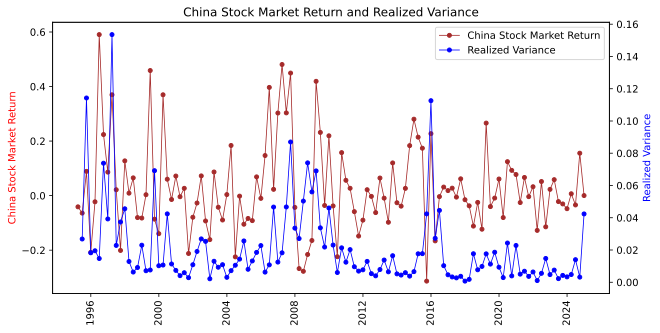

In [32]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(Qreg_data['ret'],color='brown',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='red')

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation = 90)

ax2 = ax1.twinx()
ax2.plot(Qreg_data['RV3'].shift(1),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance')

ax2.set_ylabel('Realized Variance',color='blue')

plt.title('China Stock Market Return and Realized Variance')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.savefig('d:\python2025/China Stock Market Return and Realized Variance Quarter.png',dpi = 1000,bbox_inches='tight')

plt.show();

In [33]:
Qreg_data['lRV'] = Qreg_data['RV'].shift(1)
Qreg_data['lRV1'] = Qreg_data['RV1'].shift(1)
Qreg_data['lRV2'] = Qreg_data['RV2'].shift(1)
Qreg_data['lRV3'] = Qreg_data['RV3'].shift(1)
model_qrv = smf.ols('ret ~ lRV',
                 data=Qreg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_qrv1 = smf.ols('ret ~ lRV1',
                 data=Qreg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_qrv2 = smf.ols('ret ~ lRV2',
                 data=Qreg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_qrv3 = smf.ols('ret ~ lRV3',
                 data=Qreg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

print("=" * 80)
print("Model with lRV:")
print("=" * 80)
print(model_qrv.summary())
print("\n" + "=" * 80)
print("Model with lRV1:")
print("=" * 80)
print(model_qrv1.summary())
print("\n" + "=" * 80)
print("Model with lRV2:")
print("=" * 80)
print(model_qrv2.summary())
print("\n" + "=" * 80)
print("Model with lRV3:")
print("=" * 80)
print(model_qrv3.summary())

Model with lRV:
                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.070
Date:                Thu, 23 Oct 2025   Prob (F-statistic):              0.303
Time:                        10:04:26   Log-Likelihood:                 46.659
No. Observations:                 119   AIC:                            -89.32
Df Residuals:                     117   BIC:                            -83.76
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0135      0.017    

In [44]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

stargazer = Stargazer([model_qrv, model_qrv1, model_qrv2, model_qrv3])
stargazer.title("回归结果对比分析")
stargazer.custom_columns(['模型一', '模型二', '模型三', '模型四'])
stargazer.show_model_numbers(False)
stargazer.show_confidence_intervals(False)

html_output = stargazer.render_html()
HTML(html_output)

ModuleNotFoundError: No module named 'stargazer'

In [45]:

from statsmodels.iolib.summary2 import summary_col

# 创建对比表
results_table = summary_col(
    [model_qrv, model_qrv1, model_qrv2, model_qrv3],
    model_names=['RV', 'RV1', 'RV2', 'RV3'],
    stars=True,
    float_format='%.3f',
    info_dict={
        'N': lambda x: f"{int(x.nobs)}"
    }
)

print("\n 使用 statsmodels 的 summary_col（显示t值）\n")
print(results_table)



 使用 statsmodels 的 summary_col（显示t值）


                  RV     RV1     RV2     RV3  
----------------------------------------------
Intercept      0.014   0.016   0.009   -0.002 
               (0.017) (0.016) (0.017) (0.018)
R-squared      0.012   0.012   0.031   0.050  
R-squared Adj. 0.003   0.003   0.022   0.042  
lRV            0.812                          
               (0.785)                        
lRV1                   0.628                  
                       (0.543)                
lRV2                           0.991*         
                               (0.589)        
lRV3                                   1.501**
                                       (0.699)
N              119     119     119     119    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [47]:
Qreg_data['lpd'] = Qreg_data['pd'].shift(1)
Qreg_data['lpb'] = Qreg_data['pb'].shift(1)
Qreg_data['lpe'] = Qreg_data['pe'].shift(1)
model1 = smf.ols('ret ~ lRV + lpb',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model2 = smf.ols('ret ~ lRV + lpe',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model3 = smf.ols('ret ~ lRV + lpd',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(
    [model1, model2, model3],
    model_names=['PB模型', 'PE模型', 'PD模型'],
    stars=True,
    float_format='%.3f',
    info_dict={
        'N': lambda x: f"{int(x.nobs)}"
    }
)
print(results_table)


                 PB模型    PE模型    PD模型 
--------------------------------------
Intercept      0.045   0.130   0.261  
               (0.034) (0.104) (0.292)
R-squared      0.032   0.024   0.019  
R-squared Adj. 0.012   0.004   -0.002 
lRV            1.299   1.059   1.054  
               (1.429) (1.483) (1.461)
lpb            -0.058                 
               (0.041)                
lpd                            -0.022 
                               (0.026)
lpe                    -0.042         
                       (0.035)        
N              100     100     100    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [48]:
model = smf.ols('ret ~ lRV3',
                    data=Qreg_data['1995-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model1 = smf.ols('ret ~ lRV3 + lpb',
                    data=Qreg_data['1995-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model2 = smf.ols('ret ~ lRV3 + lpe',
                    data=Qreg_data['1995-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model3 = smf.ols('ret ~ lRV3 + lpd',
                    data=Qreg_data['1995-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(
    [model, model1, model2, model3],
    model_names=['RV3', 'PB', 'PE', 'PD'],
    stars=True,
    float_format='%.3f',
    info_dict={
        'N': lambda x: f"{int(x.nobs)}"
    }
)
print(results_table)


                 RV3      PB       PE      PD  
-----------------------------------------------
Intercept      -0.002  0.044*   0.151*  0.277  
               (0.018) (0.027)  (0.082) (0.190)
R-squared      0.050   0.078    0.071   0.062  
R-squared Adj. 0.042   0.062    0.055   0.046  
lRV3           1.501** 1.808*** 1.674** 1.641**
               (0.699) (0.699)  (0.719) (0.710)
lpb                    -0.065**                
                       (0.030)                 
lpd                                     -0.024 
                                        (0.017)
lpe                             -0.052*        
                                (0.027)        
N              119     119      119     119    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [49]:
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
model = smf.ols('ret ~ lRV3',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model1 = smf.ols('ret ~ lRV3 + lpb',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model2 = smf.ols('ret ~ lRV3 + lpe',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model3 = smf.ols('ret ~ lRV3 + lpd',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})

model4 = smf.ols('ret ~ lRV3 + lcpi',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model5 = smf.ols('ret ~ lRV3 + lpb + lcpi',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model6 = smf.ols('ret ~ lRV3 + lpe + lcpi',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model7 = smf.ols('ret ~ lRV3 + lpd + lcpi',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(
    [model, model1, model2, model3, model4, model5, model6, model7],
    model_names=['RV3', 'PB', 'PE', 'PD', 'CPI', 'PB+CPI', 'PE+CPI', 'PD+CPI'],
    stars=True,
    float_format='%.3f',
    info_dict={
        'N': lambda x: f"{int(x.nobs)}"
    }
)
print(results_table)


                 RV3      PB      PE      PD      CPI      PB+CPI    PE+CPI    PD+CPI 
--------------------------------------------------------------------------------------
Intercept      -0.004  0.039   0.135   0.295   0.038     0.083**   0.257**   0.484*   
               (0.020) (0.032) (0.098) (0.289) (0.029)   (0.037)   (0.110)   (0.266)  
R-squared      0.036   0.067   0.056   0.049   0.129     0.162     0.173     0.157    
R-squared Adj. 0.026   0.047   0.036   0.029   0.111     0.136     0.147     0.130    
lRV3           1.530   1.925   1.710   1.693   2.075**   2.496**   2.433**   2.366**  
               (1.242) (1.210) (1.248) (1.227) (1.035)   (1.063)   (1.077)   (1.075)  
lcpi                                           -0.008*** -0.009*** -0.010*** -0.009***
                                               (0.003)   (0.003)   (0.003)   (0.003)  
lpb                    -0.067*                           -0.070**                     
                       (0.039)            

In [50]:

from arch.univariate import ARCHInMean, GARCH, Normal

garch_data = Market_ret_day.loc['2000-01-01':'2024-12-31', ['er']].copy() * 100
garch_data = garch_data.dropna()

print("="*80)
print("GARCH(1,1)-in-Mean 模型估计")
print("="*80)

model_garch_m = ARCHInMean(garch_data['er'], volatility=GARCH())

res = model_garch_m.fit(disp='off')

print(res.summary())

ModuleNotFoundError: No module named 'arch'

In [51]:

import matplotlib.pyplot as plt

conditional_volatility = res.conditional_volatility
conditional_variance = conditional_volatility
returns = garch_data['er']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

ax1.plot(returns.index, returns.values, color='blue', linewidth=0.5, alpha=0.7, label='Excess Returns')
ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax1.set_ylabel('Daily Excess Return (%)', fontsize=11)
ax1.set_title('Chinese Stock Market: GARCH-in-Mean Model Analysis', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')

ax2.plot(conditional_volatility.index, conditional_volatility.values, 
         color='red', linewidth=0.8, label='Conditional Volatility (σ_t)')
ax2.set_ylabel('Conditional Volatility (%)', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')

ax3.plot(conditional_variance.index, conditional_variance.values, 
         color='green', linewidth=0.8, label='Conditional Variance (σ²_t)')
ax3.set_ylabel('Conditional Variance (%²)', fontsize=11)
ax3.set_xlabel('Date', fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')

for ax in [ax1, ax2, ax3]:
   
    ax.axvspan(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-01-01'), 
               alpha=0.15, color='gray')
    
    ax.axvspan(pd.Timestamp('2015-06-01'), pd.Timestamp('2015-09-01'), 
               alpha=0.15, color='orange')
   
    ax.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-04-01'), 
               alpha=0.15, color='purple')


from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gray', alpha=0.3, label='2008 Financial Crisis'),
    Patch(facecolor='orange', alpha=0.3, label='2015 Market Crash'),
    Patch(facecolor='purple', alpha=0.3, label='2020 COVID-19')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('images/GARCH_M_Complete_Analysis.png', dpi=300, bbox_inches='tight')
plt.show();

NameError: name 'res' is not defined

In [52]:

from arch.univariate import ARCHInMean, GARCH, Normal
reg_data['lpb'] = reg_data['pb'].shift(1)

reg_mon = reg_data.loc['2000-01':'2024-12', ['ret','lpb']].copy() 
reg_mon['ret'] = reg_mon['ret'] * 100
reg_mon = reg_mon.dropna()

print("="*80)
print("GARCH(1,1)-in-Mean Model Estimation (Monthly Data)")
print("="*80)

model_garch_m_mon = ARCHInMean(y=reg_mon['ret'],x=reg_mon['lpb'], volatility=GARCH())

res_mon = model_garch_m_mon.fit(disp='off')

print(res_mon.summary())

ModuleNotFoundError: No module named 'arch'

In [56]:
import matplotlib.pyplot as plt

conditional_volatility_mon = res_mon.conditional_volatility
conditional_variance_mon = conditional_volatility_mon**2
returns_mon = reg_mon['ret']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

ax1.plot(returns_mon.index, returns_mon.values, color='blue', linewidth=0.8, 
         marker='o', markersize=3, alpha=0.7, label='Excess Returns')
ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax1.set_ylabel('Monthly Excess Return (%)', fontsize=11)
ax1.set_title('Chinese Stock Market: GARCH-in-Mean Model (Monthly Data)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')

ax2.plot(conditional_volatility_mon.index, conditional_volatility_mon.values, 
         color='red', linewidth=1.0, label='Conditional Volatility (σ_t)')
ax2.set_ylabel('Conditional Volatility (%)', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')

ax3.plot(conditional_variance_mon.index, conditional_variance_mon.values, 
         color='green', linewidth=1.0, label='Conditional Variance (σ²_t)')
ax3.set_ylabel('Conditional Variance (%²)', fontsize=11)
ax3.set_xlabel('Date', fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')

for ax in [ax1, ax2, ax3]:
   
    ax.axvspan(pd.Timestamp('2008-01-01'), pd.Timestamp('2009-01-01'), 
               alpha=0.15, color='gray')
   
    ax.axvspan(pd.Timestamp('2015-06-01'), pd.Timestamp('2015-09-01'), 
               alpha=0.15, color='orange')
 
    ax.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-04-01'), 
               alpha=0.15, color='purple')


from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gray', alpha=0.3, label='2008 Financial Crisis'),
    Patch(facecolor='orange', alpha=0.3, label='2015 Market Crash'),
    Patch(facecolor='purple', alpha=0.3, label='2020 COVID-19')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('images/GARCH_M_Monthly_Analysis.png', dpi=300, bbox_inches='tight')
plt.show();

NameError: name 'res_mon' is not defined

In [57]:
reg_data['lRV3'] = reg_data['RV3'].shift(1)
model_rv = smf.ols('RV3~ lRV3',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_rv.summary())

                            OLS Regression Results                            
Dep. Variable:                    RV3   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     29.40
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           1.22e-07
Time:                        10:18:10   Log-Likelihood:                 1036.2
No. Observations:                 300   AIC:                            -2068.
Df Residuals:                     298   BIC:                            -2061.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0035      0.001      6.384      0.0

In [61]:
Turnover = pd.read_csv('d:\python2025/Turnover_mon2024.csv')
Turnover['month'] = pd.date_range(start='1990-12-31', periods=len(Turnover), freq='M')
Turnover.set_index('month', inplace=True)
Turnover.sort_index(inplace=True)
Turnover

,to_v,to_m
month,,
1990-12-31,0.009403,0.009754
1991-01-31,0.012623,0.031899
1991-02-28,0.042994,0.046496
1991-03-31,0.006471,0.016755
1991-04-30,0.014430,0.026691
...,...,...
2024-08-31,0.205272,0.203924
2024-09-30,0.235540,0.231543
2024-10-31,0.424766,0.464635


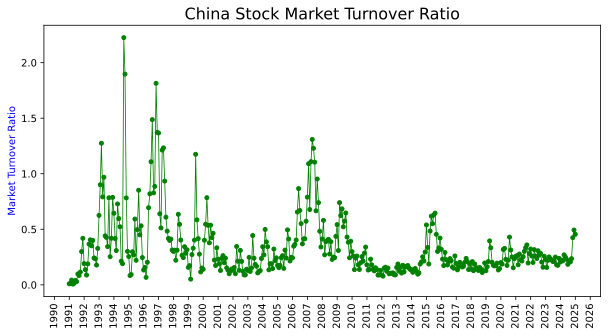

In [63]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(Turnover['to_v'],color='green',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Market Turnover Ratio')
ax1.set_ylabel('Market Turnover Ratio',color='blue')
#ax1.set_xlabel('Month')
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation = 90)

plt.title('China Stock Market Turnover Ratio', fontsize=16)
plt.show();

In [64]:
reg_data_turnover = pd.merge(reg_data,Turnover,on='month',how='left')
test = reg_data_turnover['2000-01':'2024-12']
test[['RV3','to_v']].corr()

,RV3,to_v
RV3,1.000000,0.472061
to_v,0.472061,1.000000


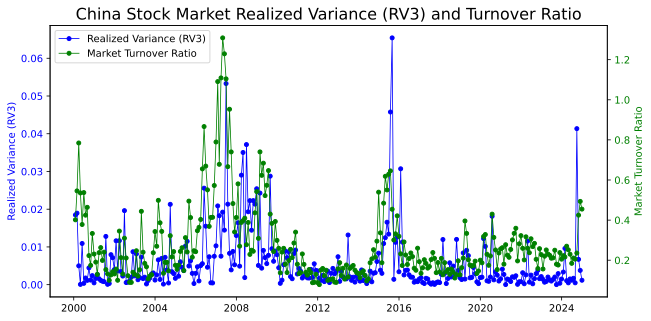

In [65]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(test['RV3'],color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance (RV3)')
ax1.set_ylabel('Realized Variance (RV3)',color='blue')
ax1.tick_params(axis='y', labelcolor='blue')   
ax1.set_title("China Stock Market Realized Variance (RV3) and Turnover Ratio", fontsize=16)

ax1.set_ylabel('Realized Variance (RV3)',color='blue')

ax2 = ax1.twinx()
ax2.plot(test['to_v'],color='green',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Market Turnover Ratio')
ax2.set_ylabel('Market Turnover Ratio',color='green')
ax2.tick_params(axis='y', labelcolor='green')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show();

In [66]:
reg_data_turnover['lto_v'] = reg_data_turnover['to_v'].shift(1)
model_turnover = smf.ols('RV3 ~ lRV3 + lto_v',
                 data=reg_data_turnover['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_turnover.summary())

                            OLS Regression Results                            
Dep. Variable:                    RV3   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     20.65
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           3.99e-09
Time:                        10:19:29   Log-Likelihood:                 1051.3
No. Observations:                 300   AIC:                            -2097.
Df Residuals:                     297   BIC:                            -2086.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.686      0.4

In [67]:
reg_data_turnover['CV'] = model_turnover.fittedvalues
reg_data_turnover['lpb'] = reg_data_turnover['pb'].shift(1)
model_cv = smf.ols('ret ~ CV',
                 data=reg_data_turnover['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
model_cv2 = smf.ols('ret ~ CV + lpb',
                    data=reg_data_turnover['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cv.summary())
print(model_cv2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.678
Date:                Thu, 23 Oct 2025   Prob (F-statistic):              0.103
Time:                        10:19:38   Log-Likelihood:                 353.38
No. Observations:                 300   AIC:                            -702.8
Df Residuals:                     298   BIC:                            -695.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0121      0.010     -1.257      0.2

In [69]:
Q_turnover = Turnover.resample('Q').sum()
Q_turnover.index.name = 'Q'
Q_turnover

,to_v,to_m
Q,,
1990-12-31,0.009403,0.009754
1991-03-31,0.062088,0.095150
1991-06-30,0.083958,0.098678
1991-09-30,0.297957,0.331421
1991-12-31,0.910144,0.672143
...,...,...
2023-12-31,0.619288,0.718467
2024-03-31,0.708789,0.775176
2024-06-30,0.666519,0.702937


In [70]:
Qreg_data_turnover = pd.merge(Qreg_data, Q_turnover, on='Q', how='left')
Qreg_data_turnover['lto_v'] = Qreg_data_turnover['to_v'].shift(1)
model_qturnover = smf.ols('RV3 ~ lRV3 + lto_v',
                 data=Qreg_data_turnover['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qturnover.summary())

                            OLS Regression Results                            
Dep. Variable:                    RV3   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     10.34
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           8.51e-05
Time:                        10:19:59   Log-Likelihood:                 271.93
No. Observations:                 100   AIC:                            -537.9
Df Residuals:                      97   BIC:                            -530.1
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0028      0.003      0.913      0.3

In [71]:
Qreg_data_turnover['CV'] = model_qturnover.fittedvalues
Qreg_data_turnover['lpb'] = Qreg_data_turnover['pb'].shift(1)
model_qcv = smf.ols('ret ~ CV',
                 data=Qreg_data_turnover['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_qcv2 = smf.ols('ret ~ CV + lpb',
                    data=Qreg_data_turnover['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_qcv3 = smf.ols('ret ~ CV + lpb + lcpi',
                    data=Qreg_data_turnover['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcv.summary())
print(model_qcv2.summary())
print(model_qcv3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.748
Date:                Thu, 23 Oct 2025   Prob (F-statistic):             0.0557
Time:                        10:20:07   Log-Likelihood:                 49.443
No. Observations:                 100   AIC:                            -94.89
Df Residuals:                      98   BIC:                            -89.68
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0465      0.031     -1.517      0.1